**this file is for any experimental data analysis you want to do**

   - have your name on and start coding code

NYC population (2024): 8478


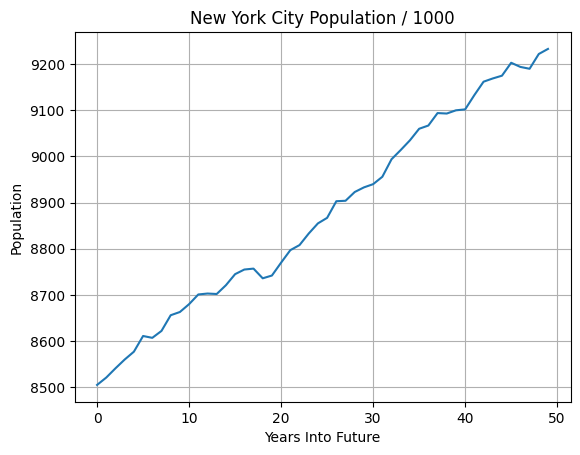

In [7]:
#Chase
import pandas as pd
import random
import matplotlib.pyplot as plt

# load file
df = pd.read_excel("SUB-IP-EST2024-POP-36.csv")

# rename first column to city
first_col = df.columns[0]
df = df.rename(columns={first_col: "city"})

# rename 7th column to 2024
df.columns.values[6] = "2024"
# select row for New York City
nyc_row = df[df["city"] == "New York city, New York"]

# use the 7th column (renamed to '2024') as initial population
initial_population = int(nyc_row["2024"].iloc[0]/1000)
print("NYC population (2024):", initial_population)

# model
class Person:
    def __init__(self, age=None):
        self.age = age if age is not None else random.randint(0, 90)
    def step(self):
        self.age += 1

class pop_growth:
    def __init__(self, population):
        self.people = [Person() for _ in range(population)]
        self.birth_rate = 0.01       # 1% per year
        self.death_rate = 0.008      # 0.8% per year
        self.migration = 0.002       # 0.2% net migration per year

        self.birth_mult = 1.0
        self.death_mult = 1.0
        self.migration_mult = 1.0

        self.year = 0

    # event every 10 years
    def apply_event(self):
        event_type = random.choice(["good", "bad"])

        if event_type == "good":
            # good event (tech boom, better healthcare, more jobs)
            self.birth_mult *= random.uniform(1.05, 1.15)
            self.death_mult *= random.uniform(0.85, 0.95)
            self.migration_mult *= random.uniform(1.10, 1.30)

        else:
            # bad event (high prices, recession, disease)
            self.birth_mult *= random.uniform(0.85, 0.95)
            self.death_mult *= random.uniform(1.10, 1.30)
            self.migration_mult *= random.uniform(0.70, 0.90)
            
    def step(self):
        # trigger event every 10 years
        if self.year % 10 == 0 and self.year != 0:
            self.apply_event()
        survivors = []
        births = 0
        for p in self.people:
            p.step()
            # death chance
            # age-dependent death probability
            age_factor = p.age / 100  # older people have higher death chance
            if random.random() > self.death_rate * (1 + age_factor):
                survivors.append(p)
                # birth chance
                if 18 <= p.age <= 40:
                    if random.random() < self.birth_rate:
                        births += 1
        self.people = survivors
        for _ in range(births):
            self.people.append(Person(age=0))

        # births
        births = int(self.birth_rate * len(self.people))
        for _ in range(births):
            self.people.append(Person(age=0))

        # migration
        migrants = int(len(self.people) * self.migration * random.uniform(0.5, 1.5))
        if migrants > 0:
            for _ in range(migrants):
                self.people.append(Person())
        else:
            self.people = self.people[:migrants]

    def population(self):
        return len(self.people)
        
years = 50
model = pop_growth(initial_population)
history = []

for _ in range(years):
    model.step()
    history.append(model.population())

# plot results
plt.plot(history)
plt.xlabel("Years Into Future")
plt.ylabel("Population")
plt.title("New York City Population / 1000")
plt.grid(True)